### Clothing_Apparel_Classification

In [1]:
#Import necessary Libraries

import numpy as np
import tensorflow as tf
from keras.datasets import fashion_mnist

In [2]:
print(tf.__version__)

2.12.0


In [3]:
# Load fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Explore the dataset
# Check the shape and size of x_train, x_test, y_train, y_test
print ("Number of samples/observations in training data: " + str(len(x_train)))
print ("Number of labels in training data: " + str(len(y_train)))
print ("Dimensions of a single image in x_train:" + str(x_train[0].shape))
print("-------------------------------------------------------------")
print ("Number of samples/observations in test data: " + str(len(x_test)))
print ("Number of labels in test data: " + str(len(y_test)))
print ("Dimensions of single image in x_test:" + str(x_test[0].shape))


Number of samples/observations in training data: 60000
Number of labels in training data: 60000
Dimensions of a single image in x_train:(28, 28)
-------------------------------------------------------------
Number of samples/observations in test data: 10000
Number of labels in test data: 10000
Dimensions of single image in x_test:(28, 28)


### View sample images

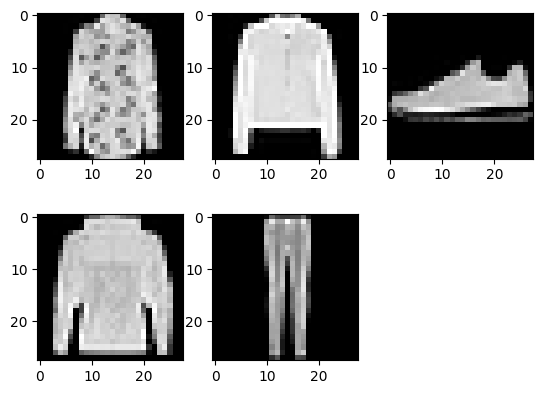

In [5]:
# Visualization library to visualize images
import matplotlib.pyplot as plt

# Plotting 5 images, Subplot arugments represent nrows, ncols and index
# Color map is set to grey since our image dataset is grayscale
plt.subplot(231)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(232)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(233)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(234)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(235)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))


# Visualize the images
plt.show()

### Model Creation


In [6]:
#Import necessary keras specific libraries

from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

# Setting Training Parameters like batch_size, epochs
batch_size = 128
epochs = 100

# Storing the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

''' Getting the data in the right 'shape' as required by Keras i.e. adding a 4th
dimension to our data thereby changing the original image shape of (60000,28,28)
to (60000,28,28,1)'''
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Storing the shape of a single image
input_shape = (img_rows, img_cols, 1)

# Changing image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the data by changing the image pixel range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

# Performing one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Calculate the number of classes and number of pixels
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

### Let's train our model

In [7]:
model_fitting = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
469/469 [==============================] - 17s 14ms/step - loss: 2.4766 - accuracy: 0.2821 - val_loss: 1.5208 - val_accuracy: 0.4981
Epoch 2/100
469/469 [==============================] - 6s 12ms/step - loss: 1.5163 - accuracy: 0.5126 - val_loss: 0.8708 - val_accuracy: 0.6985
Epoch 3/100
469/469 [==============================] - 6s 13ms/step - loss: 1.2091 - accuracy: 0.6097 - val_loss: 0.7566 - val_accuracy: 0.7319
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 1.0615 - accuracy: 0.6550 - val_loss: 0.6926 - val_accuracy: 0.7527
Epoch 5/100
469/469 [==============================] - 6s 12ms/step - loss: 0.9665 - accuracy: 0.6816 - val_loss: 0.6490 - val_accuracy: 0.7703
Epoch 6/100
469/469 [==============================] - 6s 12ms/step - loss: 0.8941 - accuracy: 0.7049 - val_loss: 0.6157 - val_accuracy: 0.7812
Epoch 7/100
469/469 [==============================] - 6s 12ms/step - loss: 0.8546 - accuracy: 0.7155 - val_loss: 0.5910 - val_accuracy

In [8]:
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Change the directory to current working directory
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [10]:
from tensorflow.keras.models import Sequential

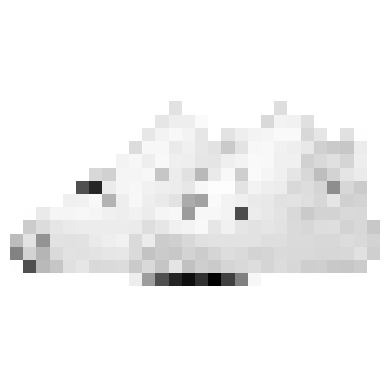

1/1 [==============================] - 0s 98ms/step
7
Sneaker
footwear


In [12]:

# Import few more necessary libraries.
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# Function to load and prepare the image in right shape
def load_image(filename):
	# Load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# Convert the image to array
	img = img_to_array(img)
	# Reshape the image into a sample of 1 channel
	img = img.reshape(1, 28, 28, 1)
	# Prepare it as pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

# Load an image and predict the apparel class
img = load_image('sneaker.jpg')

plt.imshow(img[0, :, :, 0], cmap='gray')
plt.axis('off')
plt.show()
# Load the saved model
model = load_model('clothing_classification_model.h5')
# Predict the apparel class
#class_prediction = model.predict_classes(img)
class_prediction = np.argmax(model.predict(img), axis=-1)

print(class_prediction[0])

#Map apparel category with the numerical class
if class_prediction[0] == 0:
  product = "T-shirt/top"
elif class_prediction[0] == 1:
  product = "Trouser"
elif class_prediction[0] == 2:
  product = "Pullover"
elif class_prediction[0] == 3:
  product = "Dress"
elif class_prediction[0] == 4:
  product = "Coat"
elif class_prediction[0] == 5:
  product = "Sandal"
elif class_prediction[0] == 6:
  product = "Shirt"
elif class_prediction[0] == 7:
  product = "Sneaker"
elif class_prediction[0] == 8:
  product = "Bag"
else:
  product = "Ankle boot"

print(product)

#narrowed down to 3 categories

if class_prediction[0] in [0, 2, 3, 4, 6]:
    category = "top"
elif class_prediction[0] in [1]:
    category = "bottom"
elif class_prediction[0] in [5, 7, 9]:
    category = "footwear"
elif class_prediction[0] in [8]:
    category = "accessory"
else:
    category = "unknown"

print(category)


In [13]:
# Save the model with the name clothing_classification_model
model.save('clothing_classification_model.h5')